## PROYECTO: Modelación de Factores para diagnosticar Diabetes

### Equipo:

> Carolina Barba Anaya (if720071)

> Marco Antonio Ochoa Cárdenas (if720072)

### Objetivos
 
>### **Objetivo general**
>Con ayuda de una base de datos que describe el padecimiento de una enfermedad, en este caso diabetes, simular el comportamiento de variables que resultan ser detonantes para la aparición de la diabetes en las personas. Una vez realizadas dichas simulaciones, probar la correlación que existe en dichas variables para determinar los factores que resultan de mayor riesgo para que una persona pueda padecer dicha enfermedad. 

> ### **Objetivos particulares**
>Elegir de la base de datos las causas más comunes e importantes que se deben tomar en cuenta para ser diagnosticado con diabetes y realizar una simulación de estas: 

> * Nivel de glucosa
> * Índice de masa corporal
> * Cantidad de Insulina
> * Edad

### Definicion del problema:
> Dado el U.S Department of Health and Humane Services, la diabetes es una enfermedad crónica (de larga duración) que afecta la forma en que el cuerpo convierte los alimentos en energía. La mayoría de los alimentos que come se convierten en azúcar (también llamada glucosa) que se libera en el torrente sanguíneo.

> Se estima que en Estados Unidos exiten mas de 34.2 millones de personas que viven con diabetes de las cuales representan el 10.5 % de la poblacion total, a su vez este numero arrojo que en el año 2020 se dieron casi 32000 casos de defunciones a causa de estar enfermedad

> Es por ello que un estudio de las principales causas que detonan la aparición de esta enfermedad son vitales para salvar y prevenir a tiempo la deteccion de esta y en su caso al tenerla, tener las herramientas y datos correctos para atender la problemática

### Definición de hipótesis y supuestos.
>* Los eventos del dataset son independientes.
>* Se cuenta con una variable llamada "Outcome" que hace referencia al diagnostico dado por el especialista en el ramo, esta arroja si el paciente tiene o no la enfermedad 
>* Se cuentan con una base de datos amplia por lo que estas son suficientes para dar una respuesta concluyente.
>* Como los datos de nuestro dataset son independientes, es probable que cada variable vaya a tener una distribución distinta

### Nodos a simular
> * Probabilidad de ser diagnosticado con diabetes dado el nive de glucosa del paciente
> * Probabilidad de ser diagnosticado con diabetes dado el IMC (indice de masa corporal) del paciente
> * Probabilidad de ser diagnosticado con diabetes dada la cantidad de insulina en el cuerpo del paciente
> * Personas que son diagnosticadas con diabetes dada su edad

>### **Justificación** 
>* Nodo 1 :Cuando la glucosa entra en las células, la cantidad de glucosa en el torrente sanguíneo disminuye. Si tienes diabetes  el páncreas no secreta insulina, lo que provoca una acumulación de glucosa en el torrente sanguíneo. Sin la insulina, la glucosa no puede ingresar en las células.
>* Nodo 2: El índice de masa corporal es una medida útil para determinar si una persona tiene diabetes dado que es un potenciador de riesgo para detectar diabetes en la poblacion 
>* Nodo 3: La insulina es una hormona que toma glucosa de la sangre y la transporta al interior de las células del cuerpo donde se usa como energía. La diabetes ocurre cuando el páncreas no produce suficiente insulina o cuando el cuerpo no usa la insulina debidamente (llamado resistencia a la insulina).
>* Nodo 4: Existe un estudio que muestra que la diabetes aparece en la edad madura, pasados los 45 años de edad, por lo que se quiere simular si la edad es un potenciador de desarrollo de la enfermedad

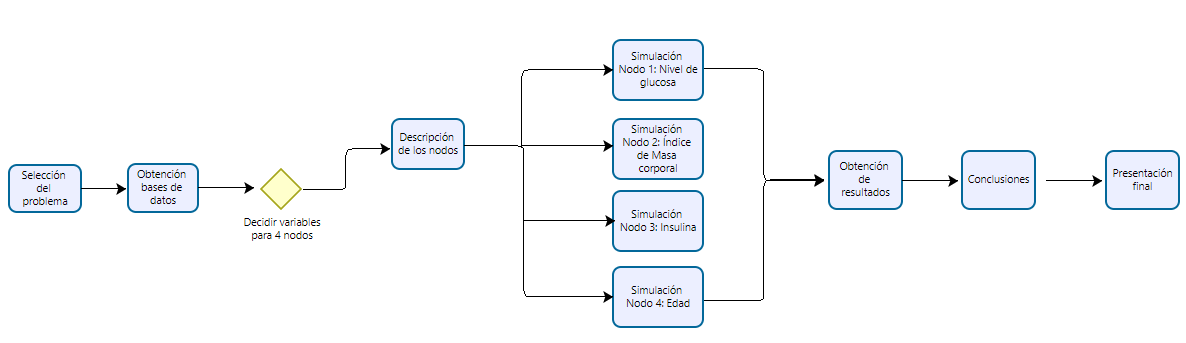

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as st 
from scipy import optimize as opt 

In [3]:
data = pd.read_csv(r'C:\Users\Caro\Documents\Carolina\Semestre 7\SPF\Proyecto_CBarba_MOchoa\diabetes.csv') #imporatción de datos
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
glucose= pd.DataFrame(data['Glucose'])# extracción de columna glucose
strokeBy_glucose = glucose.join(pd.DataFrame(data['Outcome']))# creación de un dataframe que contiene tanto a la columna glucose como a stroke
strokes = strokeBy_glucose['Outcome']==1#creación de filtro
strokeBy_glucose=strokeBy_glucose[strokes]#aplicación de filtro
strokeBy_glucose=strokeBy_glucose.set_index(np.arange(len(strokeBy_glucose))) # generación de nuevo indice

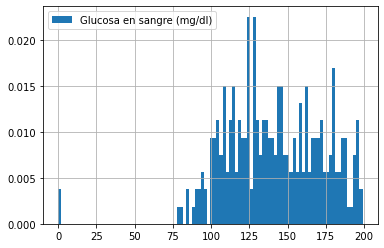

In [5]:
mu = np.mean(strokeBy_glucose['Glucose']); sigma = np.std(strokeBy_glucose)
divisiones = 100
plt.hist(strokeBy_glucose['Glucose'],divisiones,density=True,label='Glucosa en sangre (mg/dl)')
plt.legend(loc='best')
plt.grid()
plt.show()